# Final LDA Model

In [1]:
import re
import numpy as np
import pandas as pd
from pprint import pprint

from datetime import datetime

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# spacy for lemmatization
import spacy

# Plotting tools
import pyLDAvis
# import pyLDAvis.gensim  # Author: don't skip this
# pyLDAvis.gensim.prepare

# I think i need another one:
import pyLDAvis.gensim_models
import pyLDAvis.gensim_models as gensimvis

# Plots
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
%matplotlib inline

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

# TF.IDF
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import Normalizer
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.metrics.pairwise import cosine_distances

In [2]:
# NLTK Stop words
from nltk.corpus import stopwords
stop_words = stopwords.words('dutch')
stop_words.extend(['tenlastelegging', 'hof', 'althans', 'tenlastegelegd', 'naan', 'verklaring', 'verklaren', 'benadelen', 'naam', 'aangeefster', 'aangever', 'aangev', 'verbalisant', 'slachtoffer', 'rechtbank', 'uur', 'uren', 'weten', 'bestaan', 'waarheid', 'daarvoor', 'genaamd', 'maken', 'gaan', 'toverweging', 'aanzien', 'bewijs', 'feit', 'grond', 'staan', 'vaststellen', 'halen', 'vervolgens', 'nemen', 'aanhouden', 'bevinden', 'officier', 'justitie', 'overtuigen', 'bewijzen', 'maken', 'stellen', 'leggen', 'dienen', 'vrijspreken', 'daarnaast', 'bezigen', 'willen', 'gaan', 'vervolgens', 'raken', 'weten', 'proberen', 'echter', 'vraag', 'verdenken', 'vervatten', 'beslissing', 'hoger_beroep', 'verkort_vonni', 'geacht', 'instellen', 'ander', 'zien', 'toebehoren', 'hoeveelheid', 'lijst_ii', 'bereiken'])

# Test 

In [4]:

df18 = pd.read_csv('/Users/dj/Python - UvA/DSP/data_2018.csv', index_col=0) 
df19 = pd.read_csv('/Users/dj/Python - UvA/DSP/data_2019.csv', index_col=0) 
df20 = pd.read_csv('/Users/dj/Python - UvA/DSP/data_2020.csv', index_col=0) 
df21 = pd.read_csv('/Users/dj/Python - UvA/DSP/data_2021.csv', index_col=0) 

convert_dict = {'lemm': str,
                'year': str}
  
df18 = df18.astype(convert_dict)
df19 = df19.astype(convert_dict)
df20 = df20.astype(convert_dict)
df21 = df21.astype(convert_dict)

d = [df18, df19, df20, df21]

for i in d:
    test_list = []
    for j in i['lemm']:
        test_list.append(j.split())
    
    i['lemm_tok'] = test_list

print(df18.shape)
print(df19.shape)
print(df20.shape)
print(df21.shape)

tfidf18 = pd.read_csv('/Users/dj/Python - UvA/DSP/topidfs_2018.csv', index_col=0) 
tfidf19 = pd.read_csv('/Users/dj/Python - UvA/DSP/topidfs_2019.csv', index_col=0) 
tfidf20 = pd.read_csv('/Users/dj/Python - UvA/DSP/topidfs_2020.csv', index_col=0) 
tfidf21 = pd.read_csv('/Users/dj/Python - UvA/DSP/topidfs_2021.csv', index_col=0) 

top_idfs = [tfidf18, tfidf19, tfidf20, tfidf21]

i2w_df = pd.read_csv('/Users/dj/Python - UvA/DSP/i2words_df.csv', index_col=0) 


(300, 10)
(306, 10)
(315, 10)
(527, 10)


# Build Giant Function

In [4]:
def get_lda_model(df):

    data_lemmatized = df['lemm_tok']
    # Create Dictionary
    id2word = corpora.Dictionary(data_lemmatized)

    # Create Corpus
    texts = data_lemmatized

    # Term Document Frequency
    corpus = [id2word.doc2bow(text) for text in texts]
    # corpus1 = [str(item) for item in corpus]

    lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                        id2word=id2word,
                                        num_topics=5, 
                                        random_state=100,
                                        update_every=1,
                                        chunksize=100,
                                        passes=10,
                                        alpha='auto',
                                        per_word_topics=True)

    return(data_lemmatized, corpus, id2word, lda_model)

In [25]:
data_lemmatized, corpus, id2word, lda_model = get_lda_model(df21)

# Compute Model Perplexity and Coherence Score

In [26]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -7.504170862140938

Coherence Score:  0.4612774046994995


# Visualize the topics-keywords

In [27]:

# Visualize the topics
pyLDAvis.enable_notebook()
vis = gensimvis.prepare(lda_model, corpus, id2word, R = 10)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3      0.024484  0.053258       1        1  39.540258
2     -0.117527 -0.186601       2        1  20.078817
4     -0.107328  0.086275       3        1  17.643688
1     -0.035084  0.092620       4        1  16.327631
0      0.235456 -0.045552       5        1   6.409606, topic_info=                Term         Freq        Total Category  logprob  loglift
1626        kenteken  1114.000000  1114.000000  Default  10.0000  10.0000
2512  telefoonnummer  1249.000000  1249.000000  Default   9.0000   9.0000
713              man  1401.000000  1401.000000  Default   8.0000   8.0000
4491         bijnaam  1431.000000  1431.000000  Default   7.0000   7.0000
495        mededader   816.000000   816.000000  Default   6.0000   6.0000
...              ...          ...          ...      ...      ...      ...
1035          rijden   157.884048   675.673043   Topic5  -4.6462   1.2935
569              weg   158.535815   686.606977   Topic5  -4.6420   1.2816
108              lid   115.205535   425.457396   Topic5  -4.9613   1.4409
102            komen   127.491114  1549.246367   Topic5  -4.8600   0.2499
631          bedrijf   119.655423  1045.511369   Topic5  -4.9234   0.5797

[133 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
1186      5  0.991474  aanrijding
186       1  0.062032  aantreffen
186       2  0.043201  aantreffen
186       3  0.620319  aantreffen
186       4  0.273605  aantreffen
...     ...       ...         ...
572       1  0.639927      zeggen
572       2  0.249642      zeggen
572       3  0.015822      zeggen
572       4  0.087902      zeggen
572       5  0.006153      zeggen

[286 rows x 3 columns], R=10, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 3, 5, 2, 1])

In [28]:
#p = pyLDAvis.prepare(lda_model, corpus, id2word)
pyLDAvis.save_html(vis, 'lda21.html')

# TF.IDF 

In [5]:
values = []
years = ('2018', '2019', '2020', '2021')
term = 'minderjarig'

def avg_terms(data, term):
    avg = data[data['term'].str.contains(term)]['tfidf'].mean()
    return(avg)

    
for i in top_idfs:
    if term in list(i['term']):
        a  = avg_terms(i, term)
        values.append(a)
    else:
        values.append(0)

<class 'list'>


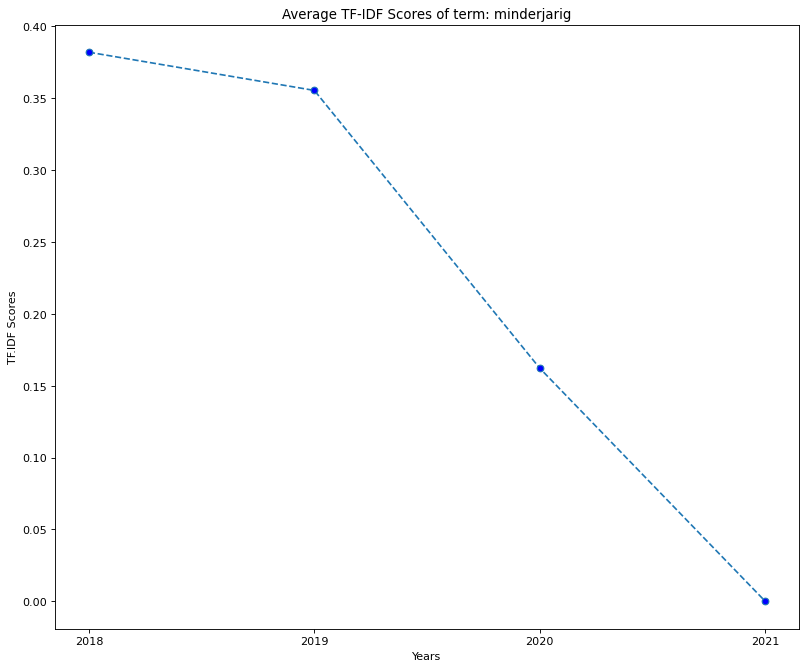

In [9]:
x_pos = [0,1,2,3]
print(type(values))

figure(figsize=(12, 10), dpi=80)

plt.plot(values, linestyle='dashed', marker='o', markerfacecolor='blue')


# Add title and axis names
plt.title('Average TF-IDF Scores of term: {}'.format(term))
plt.xlabel('Years')
plt.ylabel('TF.IDF Scores')
 
# Create names on the x axis
plt.xticks(x_pos, years)
 
# Show graph
plt.show()

In [10]:
values

[0.38203888866472707, 0.3554659770789278, 0.16213870570233843, 0]

# TF.IDF - Corrected

In [6]:
big_list = []
for i in d:
    flat_list = " "
    # iterating over the data
    for item in i['lemm']:
        flat_list = flat_list + " " + item
    big_list.append(flat_list)

tfidf_vectorizer = TfidfVectorizer(input=big_list, stop_words=stop_words)
tfidf_vector = tfidf_vectorizer.fit_transform(big_list)
tfidf_df = pd.DataFrame(tfidf_vector.toarray(), columns=tfidf_vectorizer.get_feature_names())
tfidf_df = tfidf_df.stack().reset_index()
tfidf_df = tfidf_df.rename(columns={0:'tfidf', 'level_0': 'document','level_1': 'term', 'level_2': 'term'})
top_tfidf = tfidf_df.sort_values(by=['document','tfidf'], ascending=[True,False]) # .groupby(['document']).head(5)

In [7]:
years = ('2018', '2019', '2020', '2021')
ts = ['minderjarig', 'betrokken', 'woning', 'geld', 'geweld', 'auto']
term = ts[5]

values = list(top_tfidf['tfidf'][top_tfidf['term'] == term])

In [8]:
# top_tfidf[top_tfidf['document']== 2].iloc[0:20,]

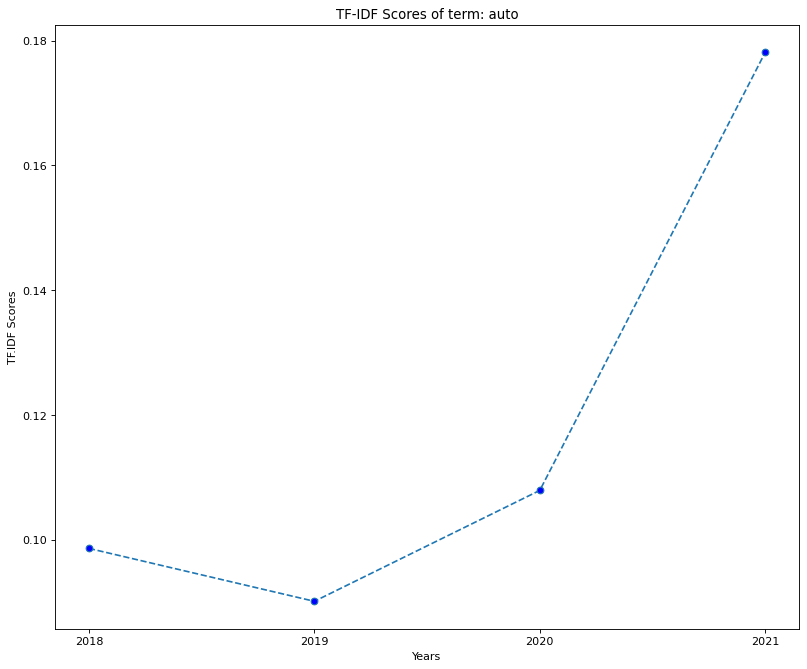

In [9]:
x_pos = (0,1,2,3)

figure(figsize=(12, 10), dpi=80)

plt.plot(values, linestyle='dashed', marker='o', markerfacecolor='blue')


# Add title and axis names
plt.title('TF-IDF Scores of term: {}'.format(term))
plt.xlabel('Years')
plt.ylabel('TF.IDF Scores')
 
# Create names on the x axis
plt.xticks(x_pos, years)
 
# Show graph
plt.show()

In [15]:
import altair as alt
import numpy as np

# 18 = 0 / 19 = 1 / 20 = 2 / 21 = 3

a = 0

# Terms in this list will get a red dot in the visualization
term_list = ['kledingwinkel', 'hennep', 'drogen'] # Highlight the words of interest

# adding a little randomness to break ties in term ranking
top_tfidf_plusRand = top_idfs[a].copy()
top_tfidf_plusRand = top_tfidf_plusRand.iloc[:300,]
top_tfidf_plusRand['tfidf'] = top_tfidf_plusRand['tfidf'] + np.random.rand(top_tfidf_plusRand.shape[0])*0.0001

# base for all visualizations, with rank calculation
base = alt.Chart(top_tfidf_plusRand).encode(
    x = 'rank:O',
    y = 'document:N'
).transform_window(
    rank = "rank()",
    sort = [alt.SortField("tfidf", order="descending")],
    groupby = ["document"],
)

# heatmap specification
heatmap = base.mark_rect().encode(
    color = 'tfidf:Q'
)

# red circle over terms in above list
circle = base.mark_circle(size=100).encode(
    color = alt.condition(
        alt.FieldOneOfPredicate(field='term', oneOf=term_list),
        alt.value('red'),
        alt.value('#FFFFFF00')        
    )
)

# text labels, white for darker heatmap colors
text = base.mark_text(baseline='middle').encode(
    text = 'term:N',
    color = alt.condition(alt.datum.tfidf >= 0.23, alt.value('white'), alt.value('black'))
)

# display the three superimposed visualizations
(heatmap + circle + text).properties(width = 1200)

alt.LayerChart(...)

# Scattertext

In [29]:
import scattertext as st
import re, io
from pprint import pprint
import pandas as pd
import numpy as np
from scipy.stats import rankdata, hmean, norm
import spacy
import os, pkgutil, json, urllib
from urllib.request import urlopen
from IPython.display import IFrame
from IPython.core.display import display, HTML
from scattertext import CorpusFromPandas, produce_scattertext_explorer
display(HTML("<style>.container { width:98% !important; }</style>"))

In [30]:
import scattertext as st
import re, io
from pprint import pprint
import pandas as pd
import numpy as np
from scipy.stats import rankdata, hmean, norm
import spacy
import os, pkgutil, json, urllib
from urllib.request import urlopen
from IPython.display import IFrame
from IPython.core.display import display, HTML
from scattertext import CorpusFromPandas, produce_scattertext_explorer
import selenium
from selenium import webdriver
import webbrowser
import codecs
display(HTML("<style>.container { width:98% !important; }</style>"))

In [48]:

#df18['year'] = df18['year'].astype("string")
#df19['year'] = df19['year'].astype("string")
#df20['year'] = df20['year'].astype("string")
#df21['year'] = df21['year'].astype("string")

frames = [df18, df21]

result = pd.concat(frames)

nlp = spacy.load("nl_core_news_sm")

In [49]:
#(result['lemm_tok'][0])

In [50]:
result['parsed'] = result.lemm.apply(nlp)

In [51]:
type(result['parsed'][0])

spacy.tokens.doc.Doc

In [52]:
type(result['parsed'][0][0])

spacy.tokens.token.Token

In [53]:
result = result.rename(columns={"Unnamed: 0": "Doc_Number"})
result["Doc_Number"] = result["Doc_Number"].astype("category")
result["year"] = result["year"].astype("category")

In [54]:
corpus_scat_text = st.CorpusFromParsedDocuments(result, category_col='year', parsed_col='parsed').build()

In [55]:
html = produce_scattertext_explorer(corpus_scat_text,
                                    category='2018',
                                    category_name='2018',
                                    not_category_name='2021',
                                    width_in_pixels=1000,
                                    minimum_term_frequency=5,
                                    metadata=corpus_scat_text.get_df()['filename'],
                                    transform= st.Scalers.log_scale_standardize) 


In [56]:
import codecs
import webbrowser
import IPython

file_name = 'scattertext1821.html'
open(file_name, 'wb').write(html.encode('utf-8'))
IFrame(src=file_name, width = 1200, height=700)

In [27]:
# d = [df18, df19, df20, df21] # Savable - done
#q = 1
#lda_models = [] # gensim.models.ldamodel.LdaModel - done
#dat_lems = [] # its a list - try - this should be in the dat column lemm - done
#corps = [] # its a list - try - done
#ids = [] # gensim - seperate df - done
#top_idfs = [] # savable - done

# Plotly - Lineplot

In [11]:
import plotly.express as px
import plotly.io as pio

pio.templates.default = "presentation"

term = 'auto'

fig = px.line(top_tfidf[top_tfidf['term'] == term],
  x= [2018, 2019, 2020, 2021],
  y="tfidf",
  title='TF-IDF Scores of term: {}'.format(term),
  height = 800)

fig.update_xaxes(type='category')
fig.show()